In [1]:
import pandas as pd
import numpy as np

In [2]:
order_list = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name='OrderList')
freight_rates = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name='FreightRates')
wh_costs = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name='WhCosts')
wh_capacities = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name='WhCapacities')
products_per_plant = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name='ProductsPerPlant')
vmi_customers = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name='VmiCustomers')
plant_ports = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name='PlantPorts')

In [3]:
# Display the first few rows of each DataFrame to verify successful loading
print("OrderList DataFrame:")
print(order_list.head())
print("\nFreightRates DataFrame:")
print(freight_rates.head())
print("\nWarehouse Costs DataFrame:")
print(wh_costs.head())
print("\nWarehouse Capacities DataFrame:")
print(wh_capacities.head())
print("\nProducts Per Plant DataFrame:")
print(products_per_plant.head())
print("\nVMI Customers DataFrame:")
print(vmi_customers.head())
print("\nPlant Ports DataFrame:")
print(plant_ports.head())

OrderList DataFrame:
       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT

In [4]:
# Count unique items in each column for each sheet and check for missing value

# Since the order date is the same, let us drop the column
order_list.drop(columns='Order Date', axis=1, inplace=True)

dataframes = {
    "OrderList": order_list,
    "FreightRates": freight_rates,
    "WarehouseCosts": wh_costs,
    "WarehouseCapacities": wh_capacities,
    "ProductsPerPlant": products_per_plant,
    "VMICustomers": vmi_customers,
    "PlantPorts": plant_ports
}

for name, df in dataframes.items():
    print(f"\n{name}")
    print(df.astype('object').describe(include='all').loc['unique', :])
    print(f"\n{name} - Missing Values:")
    print(df.isnull().sum())

print("*******************************************")
print("             Summary Statistics            ")
print("*******************************************")


# Summarize key statistics for categorical columns
for name, df in dataframes.items():
    if not df.select_dtypes(include=['object']).empty:
        print(f"{name} - Statistics for Categorical Data:")
        print(df.select_dtypes(include=['object']).describe())
        print("\n")


OrderList
Order ID                9215.0
Origin Port                  3
Carrier                      3
TPT                          5
Service Level                3
Ship ahead day count         5
Ship Late Day count          4
Customer                    46
Product ID                 772
Plant Code                   7
Destination Port             1
Unit quantity             2624
Weight                  5899.0
Name: unique, dtype: object

OrderList - Missing Values:
Order ID                0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64

FreightRates
Carrier              9
orig_port_cd        10
dest_port_cd         1
minm_wgh_qty     328.0
max_wgh_qty      327.0
svc_cd               2
minimum cost     787.0
rat

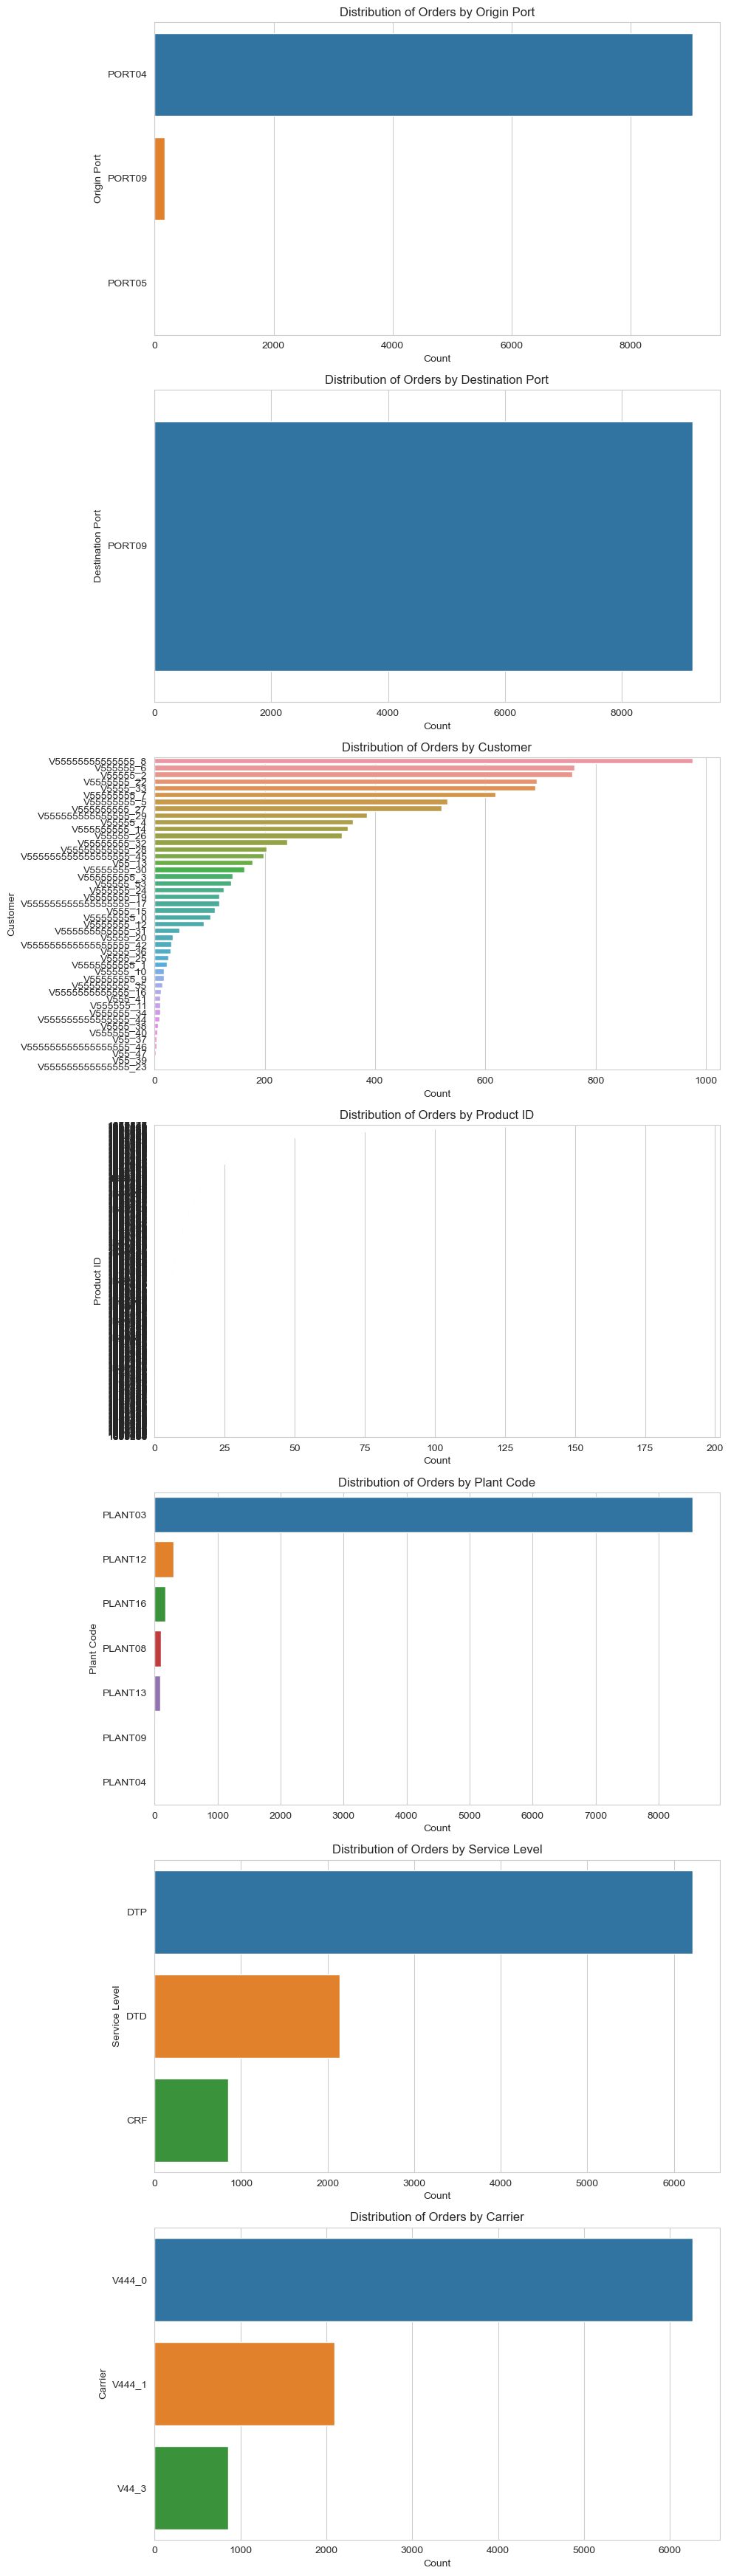

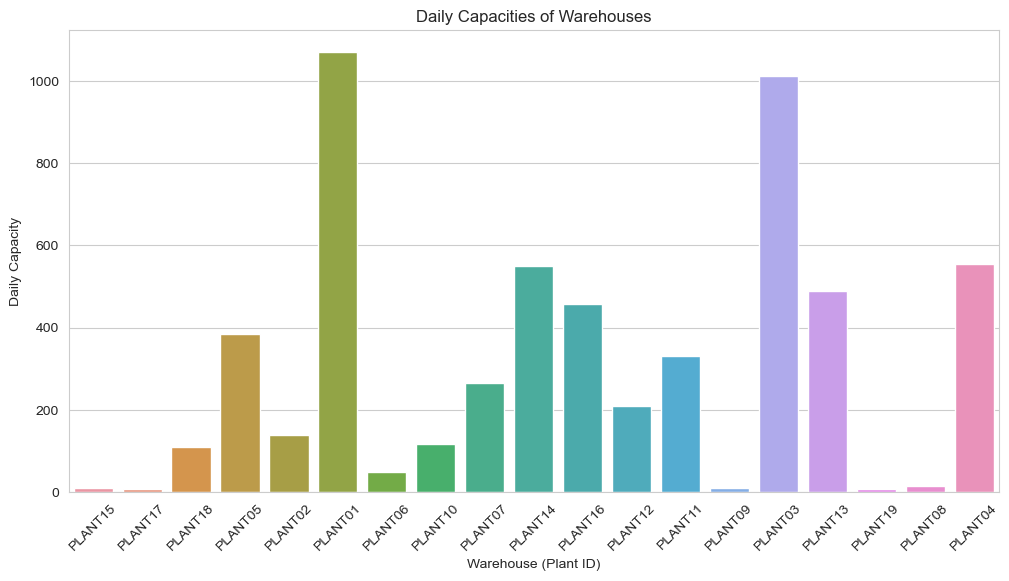

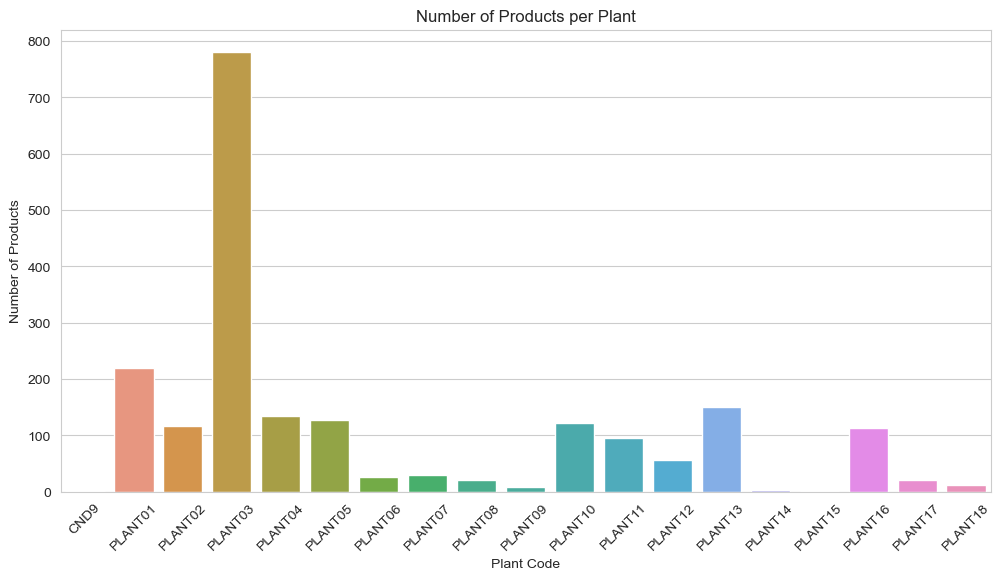

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style("whitegrid")

# Analyze the distribution of orders by various categorical features
categorical_features = ['Origin Port', 'Destination Port', 'Customer', 'Product ID', 'Plant Code', 'Service Level', 'Carrier']
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 5 * len(categorical_features)))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=order_list, y=feature, ax=axes[i], order=order_list[feature].value_counts().index)
    axes[i].set_title(f'Distribution of Orders by {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Warehouse Analysis: Capacity constraints and product distribution
wh_capacities.rename(columns={'Daily Capacity ': 'Daily Capacity'}, inplace=True)

# Plotting the capacities of each warehouse
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_capacities, x='Plant ID', y='Daily Capacity')
plt.title('Daily Capacities of Warehouses')
plt.xlabel('Warehouse (Plant ID)')
plt.ylabel('Daily Capacity')
plt.xticks(rotation=45)
plt.show()

# Analyzing the distribution of products per plant
plt.figure(figsize=(12, 6))
products_count_per_plant = products_per_plant.groupby('Plant Code').count()
sns.barplot(x=products_count_per_plant.index, y=products_count_per_plant['Product ID'])
plt.title('Number of Products per Plant')
plt.xlabel('Plant Code')
plt.ylabel('Number of Product')
plt.xticks(rotation=45)
plt.show()


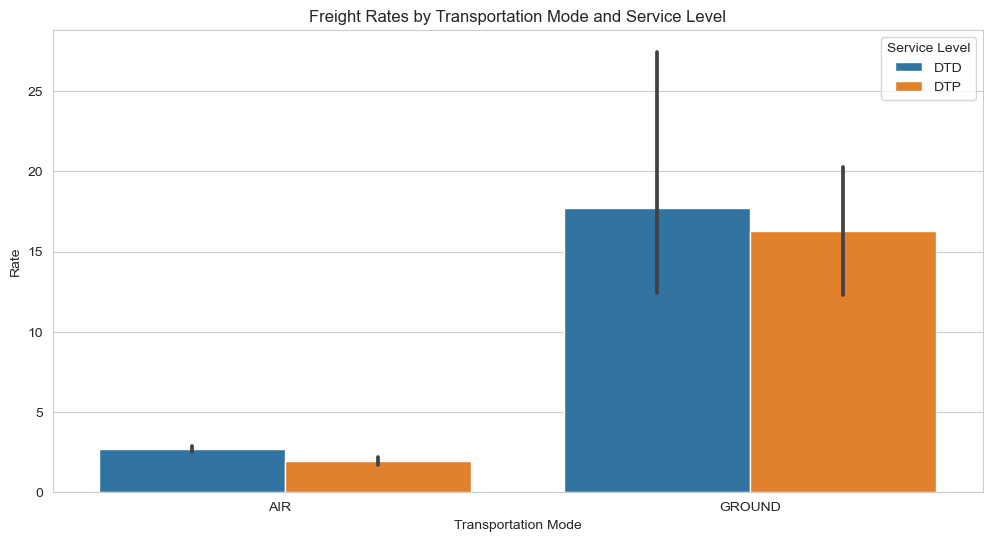

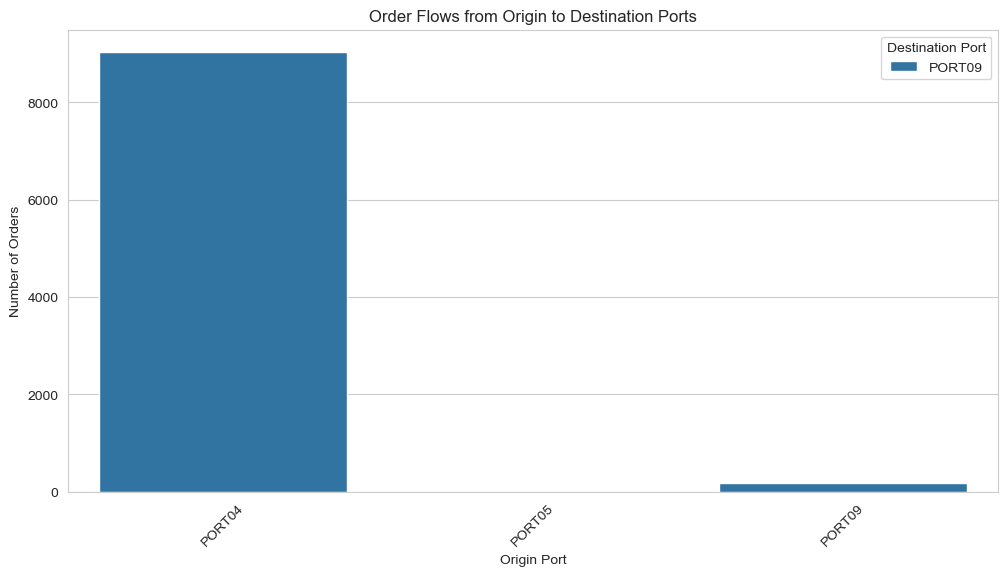

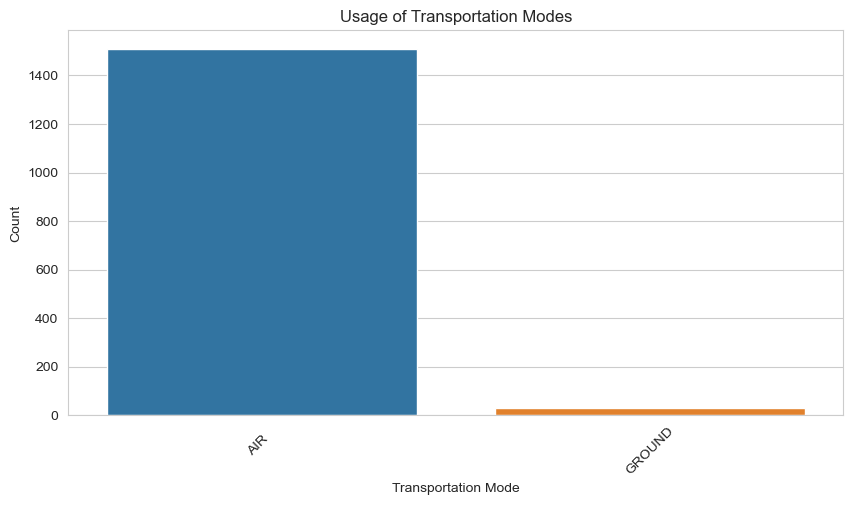

In [7]:
# Port and Transportation Analysis: Analyzing freight rates by transportation mode and service level

# Plotting freight rates by mode and service level
plt.figure(figsize=(12, 6))
sns.barplot(data=freight_rates, x='mode_dsc', y='rate', )
plt.title('Freight Rates by Transportation Mode and Service Level')
plt.xlabel('Transportation Mode')
plt.ylabel('Rate')
plt.legend(title='Service Level')
plt.show()

# Visualization of Order Flows from Origin to Destination Ports
order_flows = order_list.groupby(['Origin Port', 'Destination Port']).size().reset_index(name='Number of Orders')
plt.figure(figsize=(12, 6))
sns.barplot(x='Origin Port', y='Number of Orders', hue='Destination Port', data=order_flows)
plt.title('Order Flows from Origin to Destination Ports')
plt.xlabel('Origin Port')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Destination Port')
plt.show()

# Visualization of Transportation Modes
transport_modes = freight_rates.groupby('mode_dsc').size().reset_index(name='Count')
plt.figure(figsize=(10, 5))
sns.barplot(x='mode_dsc', y='Count', data=transport_modes)
plt.title('Usage of Transportation Modes')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [107]:
# Merge orders and freight rates to get the dataset for modeling

freight_rates.rename(columns={'orig_port_cd': 'Origin Port', 'dest_port_cd': 'Destination Port'  }, inplace=True)
dataset = pd.merge(order_list, freight_rates, left_index=True, right_index=True)
dataset.astype('object').describe(include='all').loc['unique', :]
# print(dataset.head())


Order ID                1540.0
Origin Port_x                3
Carrier_x                    2
TPT                          4
Service Level                2
Ship ahead day count         3
Ship Late Day count          1
Customer                    18
Product ID                 307
Plant Code                   6
Destination Port_x           1
Unit quantity              950
Weight                  1027.0
Carrier_y                    9
Origin Port_y               10
Destination Port_y           1
minm_wgh_qty             328.0
max_wgh_qty              327.0
svc_cd                       2
minimum cost             787.0
rate                    1029.0
mode_dsc                     2
tpt_day_cnt                  8
Carrier type                 2
Name: unique, dtype: object

### Let's predict the best mode of transportation based on certain order parameters

In [108]:
features = ["Unit quantity", "Weight", "minm_wgh_qty", "max_wgh_qty", "minimum cost", "rate", "mode_dsc"]
final_dataset = dataset[features]
final_dataset.isna().sum()

Unit quantity    0
Weight           0
minm_wgh_qty     0
max_wgh_qty      0
minimum cost     0
rate             0
mode_dsc         0
dtype: int64

In [109]:
# We need to convert mode_dsc into a numerical value.

from sklearn import preprocessing
#define the label encoder
label_encoder = preprocessing.LabelEncoder()
label = label_encoder.fit_transform(final_dataset['mode_dsc'])

final_dataset.drop("mode_dsc", axis=1, inplace=True)
final_dataset["mode_dsc"] = label

final_dataset

/var/folders/5g/3x7mwm2j36gffb7lrr33wslw0000gp/T/ipykernel_31144/2680049562.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.drop("mode_dsc", axis=1, inplace=True)
/var/folders/5g/3x7mwm2j36gffb7lrr33wslw0000gp/T/ipykernel_31144/2680049562.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset["mode_dsc"] = label


,Unit quantity,Weight,minm_wgh_qty,max_wgh_qty,minimum cost,rate,mode_dsc
0,808,14.300000,250.0,499.99,43.2272,0.7132,0
1,3188,87.940000,65.0,69.99,43.2272,0.7512,0
2,2331,61.200000,60.0,64.99,43.2272,0.7892,0
3,847,16.160000,50.0,54.99,43.2272,0.8272,0
4,2163,52.340000,35.0,39.99,43.2272,1.0552,0
...,...,...,...,...,...,...,...
1535,329,2.157478,0.0,99.99,29.3392,0.4116,0
1536,328,2.544717,500.0,1999.99,29.3392,0.3112,0
1537,279,0.055320,250.0,499.99,29.3392,0.4116,0
1538,360,0.967591,2000.0,99999.99,29.3392,0.3112,0


In [116]:
# Seperate the data into inputs(x) and label(Y)

Y = final_dataset["mode_dsc"]

x = final_dataset.drop('mode_dsc', axis=1) #returns a numpy array

x

,Unit quantity,Weight,minm_wgh_qty,max_wgh_qty,minimum cost,rate
0,808,14.300000,250.0,499.99,43.2272,0.7132
1,3188,87.940000,65.0,69.99,43.2272,0.7512
2,2331,61.200000,60.0,64.99,43.2272,0.7892
3,847,16.160000,50.0,54.99,43.2272,0.8272
4,2163,52.340000,35.0,39.99,43.2272,1.0552
...,...,...,...,...,...,...
1535,329,2.157478,0.0,99.99,29.3392,0.4116
1536,328,2.544717,500.0,1999.99,29.3392,0.3112
1537,279,0.055320,250.0,499.99,29.3392,0.4116
1538,360,0.967591,2000.0,99999.99,29.3392,0.3112


In [132]:
# Prepare the data for modeling by splitting to train and test data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,Y,train_size=0.8)

print(y_train.value_counts())
print(y_test.value_counts())

mode_dsc
0    1209
1      23
Name: count, dtype: int64
mode_dsc
0    302
1      6
Name: count, dtype: int64


### The class above is imbalanced so we need to balance them using SMOTE

In [123]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote=SMOTE()
X_smote, y_smote=smote.fit_resample(x_train,y_train)
x_train, y_train = X_smote, y_smote

y_train.value_counts()

mode_dsc
0    1211
1    1211
Name: count, dtype: int64

### Let's build our classifier using the Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42, max_depth=2, n_estimators=30, min_samples_split=3, max_leaf_nodes=5,)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=5, min_samples_split=3,
                       n_estimators=30, random_state=42)

In [160]:
# We evaluate the accuracy of our classifier using classification metrics

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

prediction = random_forest.predict(x_test)
predict_proba = random_forest.predict_proba(x_test)

fpr, tpr, thresh = roc_curve(y_test, predict_proba[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score = roc_auc_score(y_test, predict_proba[:,1])

print(auc_score)

1.0


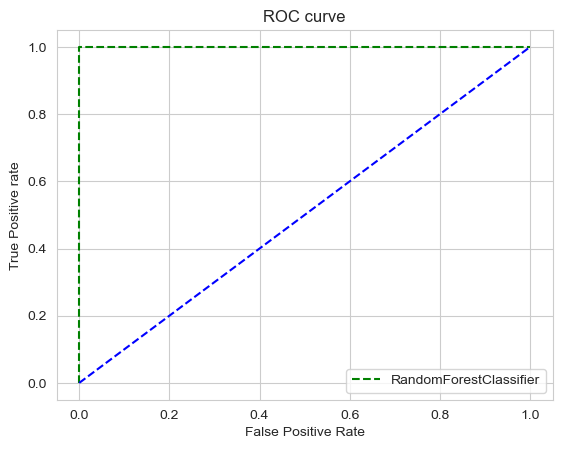

In [162]:
# ROC AUC Curve

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

##### From the above, we can see that our model gave us an accuracy of 1.0. This is a reflection of how poor the data quality is for this task. This is an example of over-fitting. In the real-world, it will be difficult to get an high accuracy of this sort

In [164]:
# Let's save the final data for future use.


final_dataset.to_csv('final_dataset.csv', index=False)